In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
test = "12"
csv_path = Path(f"Output/empty/opacity/{test}/camera1_opacity_sweep.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

df = pd.read_csv(csv_path)

required_columns = {"opacity", "loss"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

df.head()


,iter,opacity,loss,analytic_opacity_grad
0,0,0.0,0.000283,-0.000164
1,1,0.1,0.000269,-0.000148
2,2,0.2,0.000257,-0.000131
3,3,0.3,0.000247,-0.000115
4,4,0.4,0.000238,-0.000098


PosixPath('Output/empty/opacity/12/camera1_opacity_sweep.png')

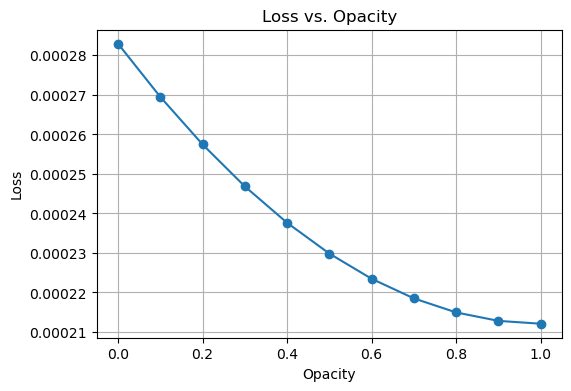

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(df["opacity"], df["loss"], marker="o")
plt.xlabel("Opacity")
plt.ylabel("Loss")
plt.title("Loss vs. Opacity")
plt.grid(True)

# Also save next to the CSV
output_png = csv_path.with_suffix(".png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png


PosixPath('Output/empty/opacity/12/camera1_opacity_sweep_analytic_grad.png')

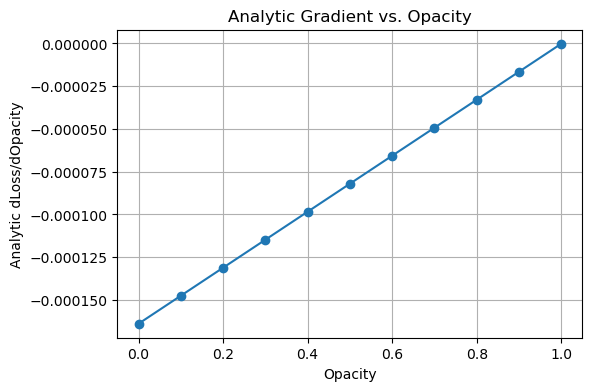

In [4]:
required_columns = {"opacity", "analytic_opacity_grad"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

plt.figure(figsize=(6, 4))
plt.plot(df["opacity"], df["analytic_opacity_grad"], marker="o")
plt.xlabel("Opacity")
plt.ylabel("Analytic dLoss/dOpacity")
plt.title("Analytic Gradient vs. Opacity")
plt.grid(True)

output_png = csv_path.with_name(csv_path.stem + "_analytic_grad.png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png


In [5]:
## COMPUTING LOSS GRADIENT FROM LOSS VALUES
import numpy as np

required_columns = {"opacity", "loss"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

opacity = df["opacity"].to_numpy(dtype=np.float64)
loss = df["loss"].to_numpy(dtype=np.float64)

# Numerical gradient dLoss/dOpacity
grad_fd = np.zeros_like(loss)

# Interior points: central difference
grad_fd[1:-1] = (loss[2:] - loss[:-2]) / (opacity[2:] - opacity[:-2])

# Boundaries: one-sided differences
grad_fd[0] = (loss[1] - loss[0]) / (opacity[1] - opacity[0])
grad_fd[-1] = (loss[-1] - loss[-2]) / (opacity[-1] - opacity[-2])

# Attach to dataframe
df["numerical_opacity_grad"] = grad_fd

df[["iter", "opacity", "loss", "numerical_opacity_grad"]]


,iter,opacity,loss,numerical_opacity_grad
0,0,0.0,0.000283,-0.000135
1,1,0.1,0.000269,-0.000127
2,2,0.2,0.000257,-0.000113
3,3,0.3,0.000247,-0.000099
4,4,0.4,0.000238,-0.000085
5,5,0.5,0.000230,-0.000071
6,6,0.6,0.000223,-0.000057
7,7,0.7,0.000218,-0.000043
8,8,0.8,0.000215,-0.000028
9,9,0.9,0.000213,-0.000014


PosixPath('Output/empty/opacity/12/camera1_opacity_sweep_grad_subplots.png')

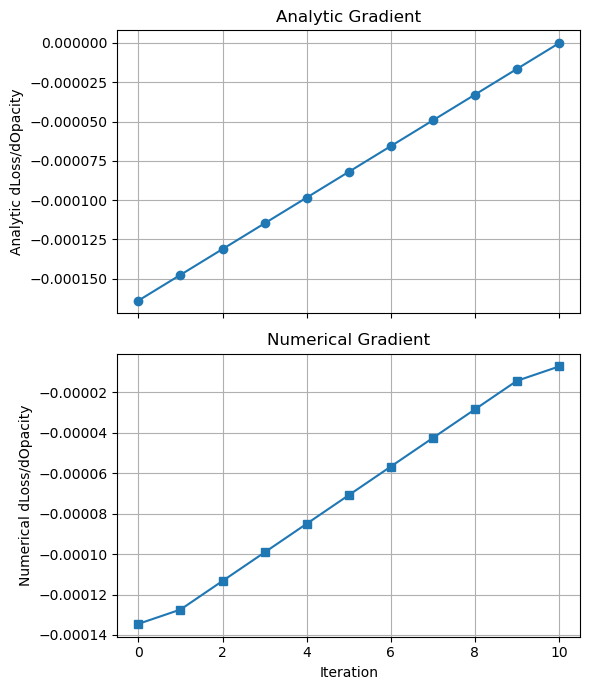

In [6]:
# ---- Edit this if your CSV uses a different column name ----
NUMERICAL_COLUMN = "numerical_opacity_grad"   # e.g. "fd_grad" or "fd_gradient"

required_columns = {"iter", "analytic_opacity_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 7), sharex=True)

# --- Top: Analytic ---
axes[0].plot(df["iter"], df["analytic_opacity_grad"], marker="o")
axes[0].set_ylabel("Analytic dLoss/dOpacity")
axes[0].set_title("Analytic Gradient")
axes[0].grid(True)

# --- Bottom: Numerical ---
axes[1].plot(df["iter"], df[NUMERICAL_COLUMN], marker="s")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Numerical dLoss/dOpacity")
axes[1].set_title("Numerical Gradient")
axes[1].grid(True)

output_png = csv_path.with_name(csv_path.stem + "_grad_subplots.png")
plt.tight_layout()
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png


PosixPath('Output/empty/opacity/12/camera1_opacity_sweep_grad_compare.png')

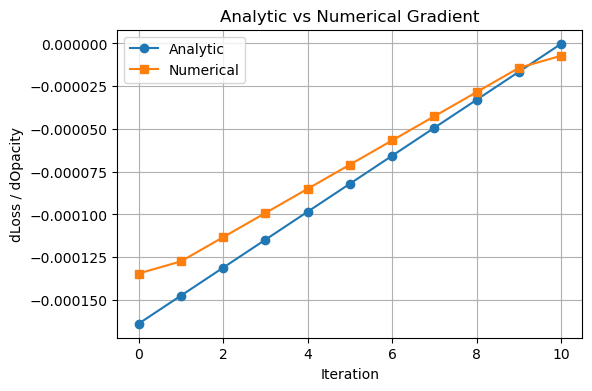

In [7]:
# ---- Edit this name if your CSV uses a different column ----
NUMERICAL_COLUMN = "numerical_opacity_grad"   # e.g. "fd_grad" or "fd_gradient"

required_columns = {"iter", "analytic_opacity_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

plt.figure(figsize=(6, 4))

plt.plot(df["iter"], df["analytic_opacity_grad"], marker="o", label="Analytic")
plt.plot(df["iter"], df[NUMERICAL_COLUMN], marker="s", label="Numerical")

plt.xlabel("Iteration")
plt.ylabel("dLoss / dOpacity")
plt.title("Analytic vs Numerical Gradient")
plt.grid(True)
plt.legend()

output_png = csv_path.with_name(csv_path.stem + "_grad_compare.png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png
